# Tarea calificada 1 INAR_2023


## Cat vs. Dog Image Classification

Este ejercicio consiste en desarrollar un modelo deep learning CNN (aunque eres libre de probar otras alternativas) para una dataset que contiene imágenes de perros y gatos (exclusivamente). 

Se debe entregar este notebook (como mínimo, se pueden entregar varios notebooks en un .zip) con los siguientes puntos:

1. Carga y pre-proceso de ficheros de datos. (**YA DESARROLLADO, SOLO DEBE SER EJECUTADO**)
2. Configura un (uno al menos, puedes presentar más) modelo CNN para la clasificación perro versus gato.
3. Realiza el entrenamiento y prueba el rendimiento del modelo con el conjunto de test que hemos recopilado en clase este año.

El dataset y la primera parte de este notebook están obtenidos, con infinitas gracias, de

https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb

Por tanto se debe mencionar la siguiente licencia:

#### Copyright 2018 Google LLC.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License.

You may obtain a copy of the License at

 https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and limitations under the License.


## 1. Carga y Pre-Proceso de Datos

Descarga por favor el .zip 

cats_and_dogs_filtered.zip

del Blackboard de la tarea en la misma ruta (carpeta) de este notebook y ejecuta los siguientes pasos.

(o si usas Google Colab lo tienes en la dirección anterior)

Mantengo la nota original del origen del dataset.


**NOTE:** The 2,000 images used in this exercise are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

In [50]:
import os
import zipfile

# Si existe el zip lo extrae
if os.path.exists('./dataset_tarea_1_2023.zip'):
    local_zip = './dataset_tarea_1_2023.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('')
    zip_ref.close()

The contents of the .zip are extracted to the base directory `cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets (see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/validation/check-your-intuition) for a refresher on training, validation, and test sets), which in turn each contain `cats` and `dogs` subdirectories. 

NOTA: Además, en el mismo directorio donde se descomprime el cats_and_dogs_filtered descomprime el test.zip en un directorio test. 

Si todo está bien nombrado y "colgando" de la misma ruta, te saldrán los siguientes tamaños de conjuntos train     /validation / test (un poco más adelante)

- total training cat images: 1000
- total training dog images: 1000
- total validation cat images: 500
- total validation dog images: 500
- total test cat images: 155
- total test dog images: 158



In [51]:
base_dir = './dataset_tarea_1_2023'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

Now, let's see what the filenames look like in the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):

In [52]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.238.jpg', 'cat.385.jpg', 'cat.386.jpg', 'cat.145.jpg', 'cat.607.jpg', 'cat.938.jpg', 'cat.658.jpg', 'cat.271.jpg', 'cat.466.jpg', 'cat.423.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


Let's find out the total number of cat and dog images in the `train` and `validation` directories:

In [53]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 461
total test dog images: 277


For both cats and dogs, we have 1,000 training images and 500 test images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

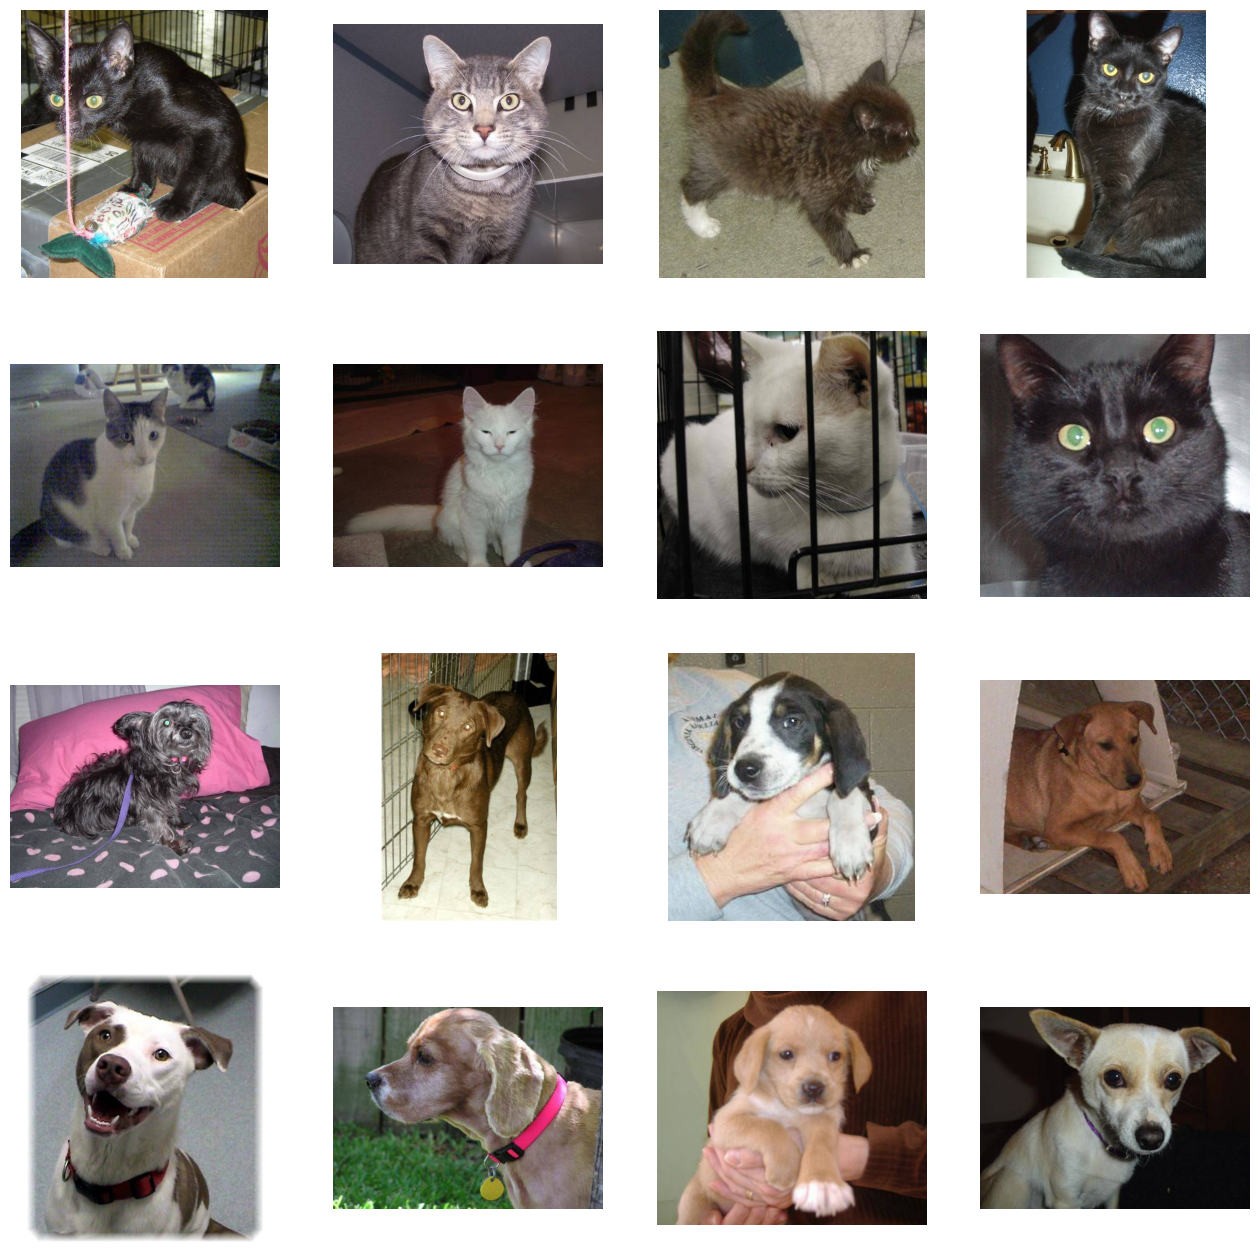

In [55]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [56]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 20

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    target_size=(256, 256))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=batch_size,
                                                         class_mode  = 'binary',
                                                         target_size = (256, 256))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=batch_size,
                                                         class_mode  = 'binary',
                                                         target_size = (256, 256))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 2. Modelo CNN (con summary + compile)

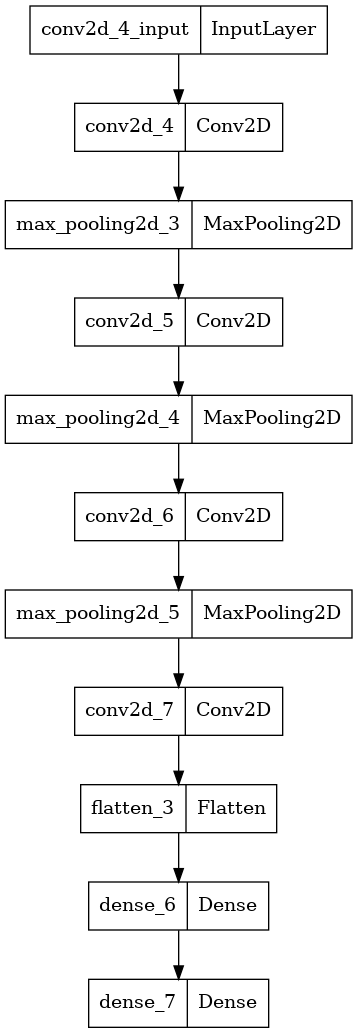

In [57]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.optimizers import RMSprop
from keras.utils import plot_model

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = RMSprop(learning_rate=1e-4), 
              loss='binary_crossentropy', 
              metrics = ['acc'])

# Mostrar la gráfica de la red neuronal
PATH = os.getcwd() + '/imagenes/modelo.png'
plot_model(model, to_file=PATH)


# 3. Entrenamiento del modelo (.fit) y rendimiento del modelo (accuracy) con conjunto test

In [58]:
epochs = 50
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit(train_generator,
                    steps_per_epoch= steps_per_epoch,
                    epochs= epochs,
                    validation_data= validation_generator,
                    validation_steps= validation_steps,
                    verbose = 2)

Epoch 1/50
100/100 - 8s - loss: 0.7009 - acc: 0.5765 - val_loss: 0.6216 - val_acc: 0.6660 - 8s/epoch - 83ms/step
Epoch 2/50
100/100 - 8s - loss: 0.6013 - acc: 0.6785 - val_loss: 0.5846 - val_acc: 0.6950 - 8s/epoch - 75ms/step
Epoch 3/50
100/100 - 7s - loss: 0.5414 - acc: 0.7235 - val_loss: 0.6759 - val_acc: 0.6290 - 7s/epoch - 72ms/step
Epoch 4/50
100/100 - 7s - loss: 0.4975 - acc: 0.7645 - val_loss: 0.5686 - val_acc: 0.7020 - 7s/epoch - 71ms/step
Epoch 5/50
100/100 - 7s - loss: 0.4393 - acc: 0.7960 - val_loss: 0.5785 - val_acc: 0.6960 - 7s/epoch - 71ms/step
Epoch 6/50
100/100 - 7s - loss: 0.3919 - acc: 0.8200 - val_loss: 0.5878 - val_acc: 0.7040 - 7s/epoch - 72ms/step
Epoch 7/50
100/100 - 8s - loss: 0.3340 - acc: 0.8550 - val_loss: 0.5920 - val_acc: 0.7040 - 8s/epoch - 75ms/step
Epoch 8/50
100/100 - 7s - loss: 0.2905 - acc: 0.8765 - val_loss: 0.7036 - val_acc: 0.6950 - 7s/epoch - 75ms/step
Epoch 9/50
100/100 - 7s - loss: 0.2371 - acc: 0.9060 - val_loss: 0.6479 - val_acc: 0.7150 - 7s/e

### Mostrar información del entrenamiento y guardar el modelo y guardar el modelo

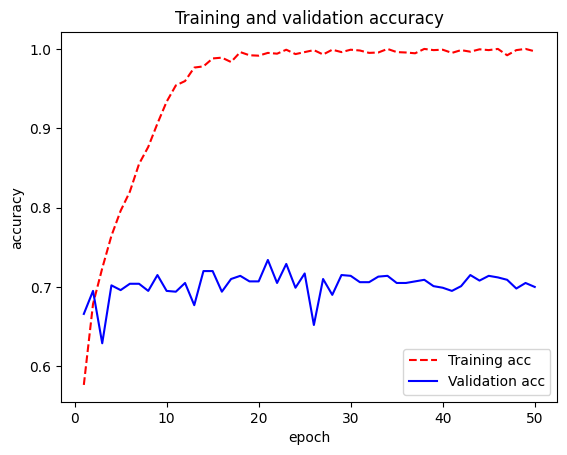

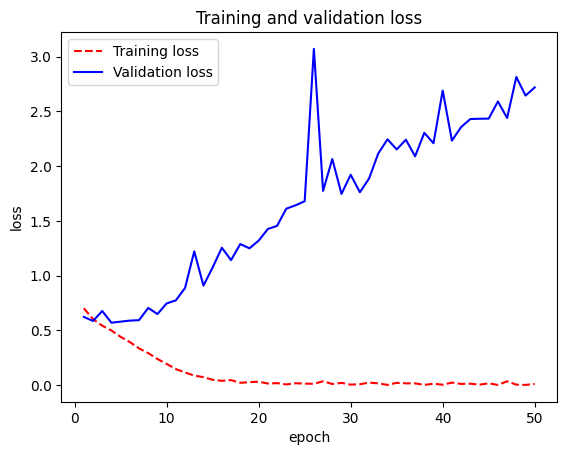

50/50 [==============================] - 1s 27ms/step - loss: 2.7192 - acc: 0.7000

Test accuracy: 0.699999988079071


In [59]:
# Guardar los pesos del modelo

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

# Dibujar las gráficas de precisión y pérdida

plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show()

# Mostrar la precisión del modelo
test_loss, test_acc = model.evaluate(test_generator)
print('\nTest accuracy:', test_acc)

# Guardar el modelo
PATH = os.getcwd() + '/modelos/model.keras'
model.save(PATH)

Podemos observar que el modelo ha alcanzado una precisión del 71% en el conjunto de validación, mientras que la precisión en el conjunto de entrenamiento es del 100%. Esto es un ejemplo de sobreajuste: el rendimiento del modelo en el conjunto de entrenamiento es considerablemente mejor que en el conjunto de validación. Esto explica porque en el conjunto de test el rendimiento es mejorable.

Para mejorar el sobreajuste podemos utilizar capas de dropout, o aumentar el tamaño del conjunto de entrenamiento.

# 4. Trabajo adicional (Neural Transfer, Fine Tuning, visualización de capas intermedias ...)

## Data augmentation
 Una de las formas de paliar el sobreajuste es aumentar el número de datos de entrenamiento. Con la técnica de data augmentation, se generan más datos de entrenamiento a partir de los datos originales, aplicando transformaciones aleatorias a las imágenes, como rotaciones, volteos horizontales, zooms y desplazamientos. Esto ayuda a exponer el modelo a diferentes aspectos de los datos de entrenamiento, y puede ayudar a que el modelo generalice mejor.

### Primero vamos a rehacer el generador de datos de entrenamiento con data augmentation.

In [60]:
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest' )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    target_size=(256, 256))

Found 2000 images belonging to 2 classes.


### Entrenamos el modelo con el nuevo generador de datos de entrenamiento con data augmentation.

In [61]:
epochs = 50
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history_da = model.fit(train_generator,
                    steps_per_epoch= steps_per_epoch,
                    epochs= epochs,
                    validation_data= validation_generator,
                    validation_steps= validation_steps,
                    verbose = 2)

Epoch 1/50
100/100 - 20s - loss: 1.0063 - acc: 0.6275 - val_loss: 0.5839 - val_acc: 0.7050 - 20s/epoch - 200ms/step
Epoch 2/50
100/100 - 19s - loss: 0.6256 - acc: 0.6530 - val_loss: 0.5574 - val_acc: 0.7090 - 19s/epoch - 195ms/step
Epoch 3/50
100/100 - 18s - loss: 0.6012 - acc: 0.6785 - val_loss: 0.5277 - val_acc: 0.7330 - 18s/epoch - 185ms/step
Epoch 4/50
100/100 - 19s - loss: 0.5715 - acc: 0.7175 - val_loss: 0.5495 - val_acc: 0.7260 - 19s/epoch - 187ms/step
Epoch 5/50
100/100 - 19s - loss: 0.5741 - acc: 0.7065 - val_loss: 0.5321 - val_acc: 0.7260 - 19s/epoch - 185ms/step
Epoch 6/50
100/100 - 18s - loss: 0.5681 - acc: 0.7130 - val_loss: 0.5458 - val_acc: 0.7320 - 18s/epoch - 185ms/step
Epoch 7/50
100/100 - 20s - loss: 0.5670 - acc: 0.7125 - val_loss: 0.5340 - val_acc: 0.7240 - 20s/epoch - 196ms/step
Epoch 8/50
100/100 - 21s - loss: 0.5725 - acc: 0.7090 - val_loss: 0.5134 - val_acc: 0.7460 - 21s/epoch - 212ms/step
Epoch 9/50
100/100 - 23s - loss: 0.5595 - acc: 0.7150 - val_loss: 0.5245

### Comprobamos los resultados

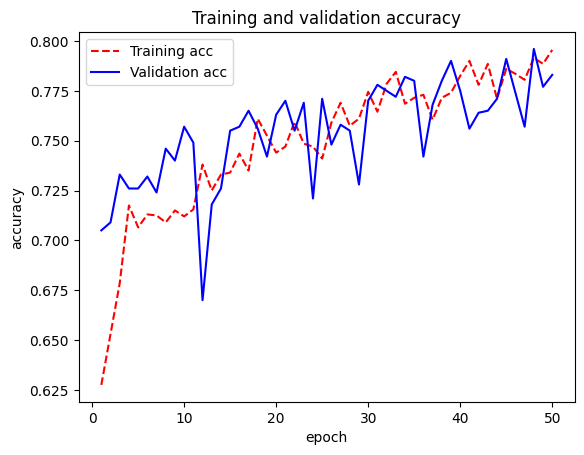

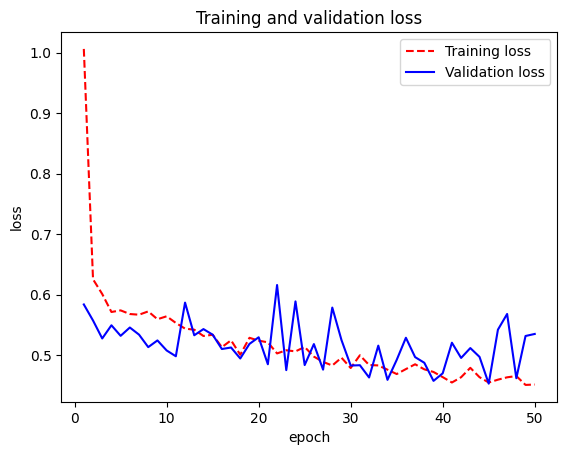

50/50 [==============================] - 1s 28ms/step - loss: 0.5352 - acc: 0.7830

Test accuracy: 0.7829999923706055


In [62]:
# Guardar los pesos del modelo

history_dict = history_da.history
acc_da = history_dict['acc']
val_acc_da = history_dict['val_acc']
loss_da = history_dict['loss']
val_loss_da = history_dict['val_loss']
epochs = range(1, len(acc_da) + 1)

# Dibujar las gráficas de precisión y pérdida

plt.plot(epochs, acc_da, 'r--', label='Training acc')
plt.plot(epochs, val_acc_da, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()
plt.figure()
plt.plot(epochs, loss_da, 'r--', label='Training loss')
plt.plot(epochs, val_loss_da, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show()

# Mostrar la precisión del modelo
test_loss_da, test_acc_da = model.evaluate(test_generator)
print('\nTest accuracy:', test_acc_da)

# Guardar el modelo
PATH = os.getcwd() + '/modelos/model_data_augmentation.keras'
model.save(PATH)

Vemos una mejora significativa en la precisión del modelo en el conjunto de validación: del 71% al 82%. Aun así, hay margen de mejora, ya que el modelo sigue sobreajustando. Esto se puede solucionar con técnicas de regularización, como dropout o aumentando el tamaño del conjunto de entrenamiento.

En nuestro caso, vamos a utilizar transfer learning.

## Neuronal Transfer
Una manera de mejorar drásticamente el rendimiento de un modelo de aprendizaje profundo, incluso con un conjunto de datos de entrenamiento pequeño, es inicializar el modelo con una red pre-entrenada. En este caso voy a utilizar el modelo VGG16, que fue entrenado en el conjunto de datos ImageNet. ImageNet contiene más de 10 millones de imágenes con 10.000 clases diferentes. Este modelo es capaz de distinguir entre 1.000 clases diferentes, incluyendo diferentes tipos de animales, plantas, vehículos, etc.

### Cargamos el modelo VGG16 sin la parte superior (top) y lo congelamos

In [63]:
from keras.applications import VGG16

pre_trained_model = VGG16(input_shape=(256, 256, 3),
                            include_top=False,
                            weights='imagenet')

#Congelamos las capas de la base convolucional

for layer in pre_trained_model.layers:
  layer.trainable = False

### Creamos el modelo de transferencia neuronal

In [64]:
model_transfer_learning = Sequential()

model_transfer_learning.add(pre_trained_model)
model_transfer_learning.add(Flatten())
model_transfer_learning.add(Dense(256, activation='relu'))
model_transfer_learning.add(Dense(1, activation='sigmoid'))

model_transfer_learning.compile(optimizer = RMSprop(learning_rate=1e-4), 
              loss='binary_crossentropy', 
              metrics = ['acc'])

### Entrenamos el modelo de transferencia neuronal

In [65]:
epochs = 50
batch_size = 32

steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history_tl = model_transfer_learning.fit(train_generator,
                    steps_per_epoch= steps_per_epoch,
                    epochs= epochs,
                    validation_data= validation_generator,
                    validation_steps= validation_steps,
                    verbose = 2)

Epoch 1/50
62/62 - 15s - loss: 0.7126 - acc: 0.6532 - val_loss: 0.4802 - val_acc: 0.7500 - 15s/epoch - 248ms/step
Epoch 2/50
62/62 - 14s - loss: 0.5156 - acc: 0.7452 - val_loss: 0.3506 - val_acc: 0.8290 - 14s/epoch - 219ms/step
Epoch 3/50
62/62 - 15s - loss: 0.4433 - acc: 0.7847 - val_loss: 0.3208 - val_acc: 0.8435 - 15s/epoch - 236ms/step
Epoch 4/50
62/62 - 15s - loss: 0.4221 - acc: 0.8137 - val_loss: 0.2363 - val_acc: 0.9097 - 15s/epoch - 235ms/step
Epoch 5/50
62/62 - 15s - loss: 0.4142 - acc: 0.8177 - val_loss: 0.2135 - val_acc: 0.9177 - 15s/epoch - 235ms/step
Epoch 6/50
62/62 - 15s - loss: 0.3614 - acc: 0.8306 - val_loss: 0.2108 - val_acc: 0.9145 - 15s/epoch - 236ms/step
Epoch 7/50
62/62 - 15s - loss: 0.3523 - acc: 0.8524 - val_loss: 0.2044 - val_acc: 0.9194 - 15s/epoch - 238ms/step
Epoch 8/50
62/62 - 15s - loss: 0.3368 - acc: 0.8540 - val_loss: 0.1782 - val_acc: 0.9274 - 15s/epoch - 239ms/step
Epoch 9/50
62/62 - 15s - loss: 0.3205 - acc: 0.8524 - val_loss: 0.2346 - val_acc: 0.9000

### Comprobamos los resultados

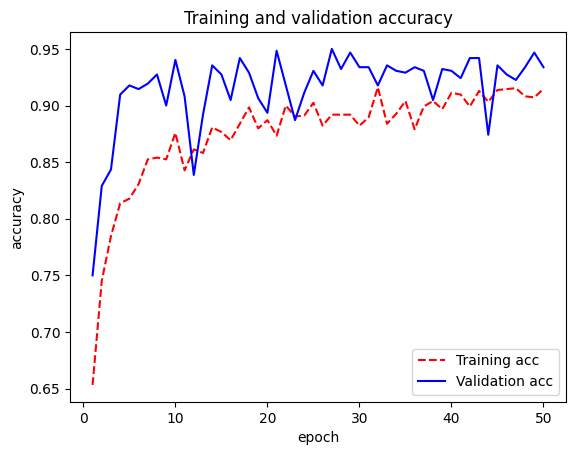

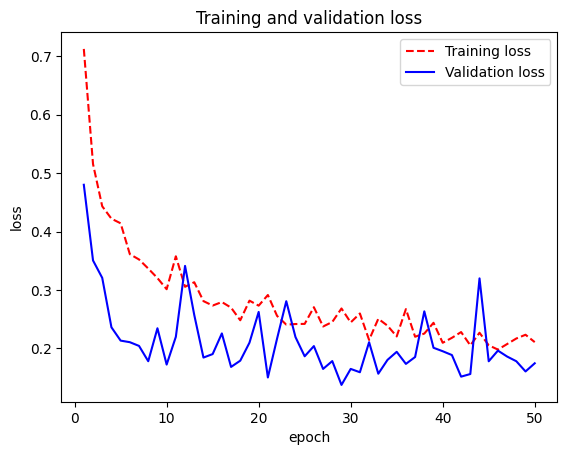

50/50 [==============================] - 5s 100ms/step - loss: 0.1754 - acc: 0.9320

Test accuracy: 0.9319999814033508


In [66]:
# Guardar los pesos del modelo

history_dict = history_tl.history
acc_tl = history_dict['acc']
val_acc_tl = history_dict['val_acc']
loss_tl = history_dict['loss']
val_loss_tl = history_dict['val_loss']
epochs = range(1, len(acc_tl) + 1)

# Dibujar las gráficas de precisión y pérdida

plt.plot(epochs, acc_tl, 'r--', label='Training acc')
plt.plot(epochs, val_acc_tl, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()
plt.figure()
plt.plot(epochs, loss_tl, 'r--', label='Training loss')
plt.plot(epochs, val_loss_tl, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show()

# Mostrar la precisión del modelo
test_loss_tl, test_acc_tl = model_transfer_learning.evaluate(test_generator)
print('\nTest accuracy:', test_acc_tl)

# Guardar el modelo
PATH = os.getcwd() + '/modelos/model_transfer_learning.keras'
model.save(PATH)

## Fine Tuning
Para sacarle más partido aun a la trasferencia neuronal, vamos a realizar un fine tuning. El fine tuning consiste en hacer un ajust más fino y entrenar también alguna de las capas finales del modelo pre-entrenado con nuestro conjunto de datos. Esto permite que el modelo pre-entrenado se adapte mejor a nuestro conjunto de datos, ya que las capas finales son las que aprenden características específicas de los datos de entrenamiento.

### Cargamos el modelo VGG16 pero esta vez no congelaremos el bloque 5 que corresponde a las capas del final del modelo (La que se centran más de detalles en escpecifico)

In [67]:
pre_trained_model = VGG16(input_shape=(256, 256, 3),
                            include_top=False,
                            weights='imagenet')

pre_trained_model.trainable = True
set_trainable = False

for layer in pre_trained_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

### Creamos un nuevo modelo de transferencia neuronal

In [68]:
model_fine_tuning = Sequential()

model_fine_tuning.add(pre_trained_model)
model_fine_tuning.add(Flatten())
model_fine_tuning.add(Dense(256, activation='relu'))
model_fine_tuning.add(Dense(1, activation='sigmoid'))

model_fine_tuning.compile(optimizer = RMSprop(learning_rate=1e-4), 
              loss='binary_crossentropy', 
              metrics = ['acc'])

### Entrenamos el modelo de transferencia neuronal

In [69]:
epochs = 50
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history_ft = model_fine_tuning.fit(train_generator,
                    steps_per_epoch= steps_per_epoch,
                    epochs= epochs,
                    validation_data= validation_generator,
                    validation_steps= validation_steps,
                    verbose = 2)

Epoch 1/50
62/62 - 17s - loss: 0.6546 - acc: 0.6734 - val_loss: 0.2194 - val_acc: 0.9290 - 17s/epoch - 272ms/step
Epoch 2/50
62/62 - 15s - loss: 0.3481 - acc: 0.8427 - val_loss: 0.3508 - val_acc: 0.8645 - 15s/epoch - 241ms/step
Epoch 3/50
62/62 - 16s - loss: 0.3001 - acc: 0.8839 - val_loss: 0.1496 - val_acc: 0.9435 - 16s/epoch - 258ms/step
Epoch 4/50
62/62 - 15s - loss: 0.2609 - acc: 0.8911 - val_loss: 0.5096 - val_acc: 0.8161 - 15s/epoch - 247ms/step
Epoch 5/50
62/62 - 15s - loss: 0.2168 - acc: 0.9226 - val_loss: 0.4496 - val_acc: 0.8565 - 15s/epoch - 248ms/step
Epoch 6/50
62/62 - 16s - loss: 0.2497 - acc: 0.9097 - val_loss: 0.1022 - val_acc: 0.9613 - 16s/epoch - 261ms/step
Epoch 7/50
62/62 - 15s - loss: 0.2023 - acc: 0.9298 - val_loss: 0.1511 - val_acc: 0.9532 - 15s/epoch - 249ms/step
Epoch 8/50
62/62 - 15s - loss: 0.1856 - acc: 0.9387 - val_loss: 0.2650 - val_acc: 0.9210 - 15s/epoch - 245ms/step
Epoch 9/50
62/62 - 15s - loss: 0.1518 - acc: 0.9468 - val_loss: 0.1319 - val_acc: 0.9565

### Comprobamos los resultados

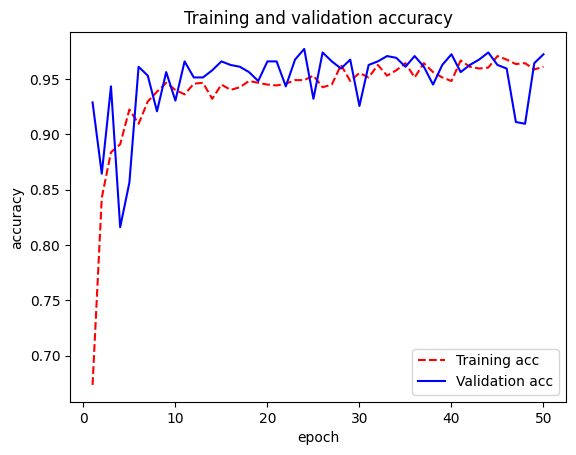

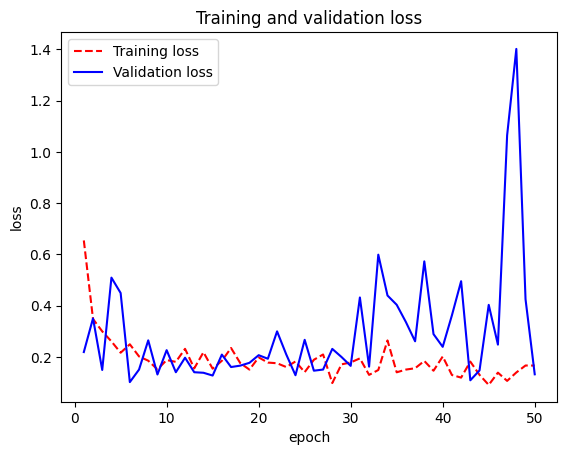

50/50 [==============================] - 5s 103ms/step - loss: 0.2788 - acc: 0.9650

Test accuracy: 0.9649999737739563


In [70]:
# Guardar los pesos del modelo

history_dict = history_ft.history
acc_ft = history_dict['acc']
val_acc_ft = history_dict['val_acc']
loss_ft = history_dict['loss']
val_loss_ft = history_dict['val_loss']
epochs = range(1, len(acc_ft) + 1)

# Dibujar las gráficas de precisión y pérdida

plt.plot(epochs, acc_ft, 'r--', label='Training acc')
plt.plot(epochs, val_acc_ft, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()
plt.figure()
plt.plot(epochs, loss_ft, 'r--', label='Training loss')
plt.plot(epochs, val_loss_ft, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show()

# Mostrar la precisión del modelo
test_loss_ft, test_acc_ft = model_fine_tuning.evaluate(test_generator)
print('\nTest accuracy:', test_acc_ft)

# Guardar el modelo
PATH = os.getcwd() + '/modelos/model_fine_tuning.keras'
model.save(PATH)

## Comparación modelos

Vamos a comparar los resultados de los cuatro modelos que hemos entrenado: modelo base, modelo con data augmentation, modelo de transferencia neuronal y modelo de transferencia neuronal con fine tuning.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

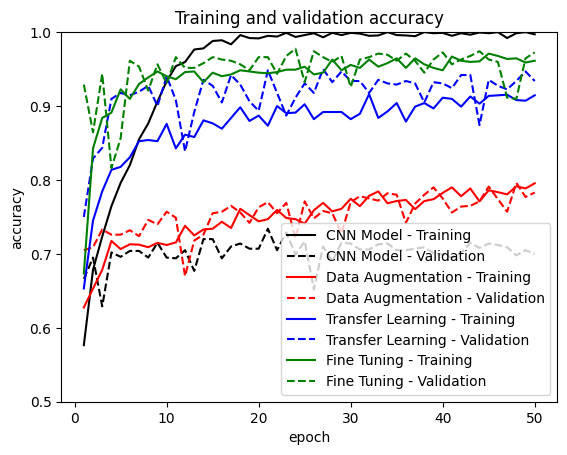

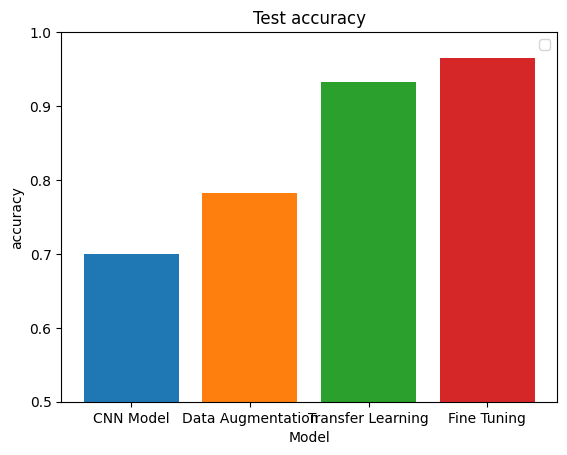

<Figure size 640x480 with 0 Axes>

In [73]:
plt.plot(epochs, acc, 'k', label='CNN Model - Training')
plt.plot(epochs, val_acc, 'k--', label='CNN Model - Validation')
plt.plot(epochs, acc_da, 'r', label='Data Augmentation - Training')
plt.plot(epochs, val_acc_da, 'r--', label='Data Augmentation - Validation')
plt.plot(epochs, acc_tl, 'b', label='Transfer Learning - Training')
plt.plot(epochs, val_acc_tl, 'b--', label='Transfer Learning - Validation')
plt.plot(epochs, acc_ft, 'g', label='Fine Tuning - Training')
plt.plot(epochs, val_acc_ft, 'g--', label='Fine Tuning - Validation')

plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.ylim([0.5,1])
plt.xlabel('epoch')

# Añadir la leyenda
plt.legend()

# Guardar la gráfica de la precisión
PATH = os.getcwd() + '/imagenes/accuracy.png'
plt.savefig(PATH)

plt.figure()

# Diagrama de barras de la precisión en test
plt.bar('CNN Model', test_acc)
plt.bar('Data Augmentation', test_acc_da)
plt.bar('Transfer Learning', test_acc_tl)
plt.bar('Fine Tuning', test_acc_ft)

plt.title('Test accuracy')
plt.ylabel('accuracy')
plt.ylim([0.5,1])
plt.xlabel('Model')

# Añadir la leyenda
plt.legend()

# Guardar el histograma de la precisión
PATH = os.getcwd() + '/imagenes/histograma.png'
plt.savefig(PATH)

plt.figure()

## Probar los modelos con mi gato

Vamos a probar los modelos con fotos de mi gato despues de un viaje en coche (se marea mucho)

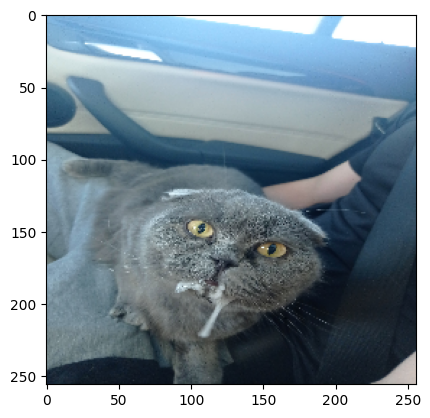

1/1 [==============================] - 0s 96ms/step
Modelo CNN con data augmentation - Es un perro
1/1 [==============================] - 0s 100ms/step
Modelo Transfer Learning - Es un perro
1/1 [==============================] - 0s 128ms/step
Modelo Fine Tuning - Es un perro


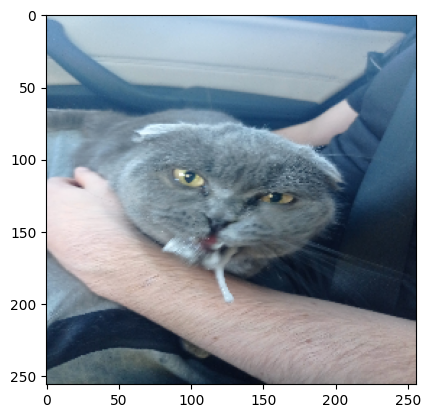

1/1 [==============================] - 0s 23ms/step
Modelo CNN con data augmentation - Es un perro
1/1 [==============================] - 0s 23ms/step
Modelo Transfer Learning - Es un gato
1/1 [==============================] - 0s 24ms/step
Modelo Fine Tuning - Es un gato


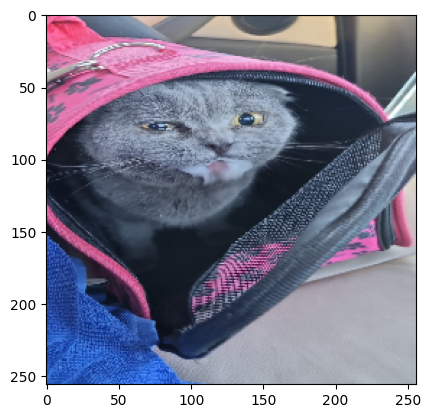

1/1 [==============================] - 0s 26ms/step
Modelo CNN con data augmentation - Es un perro
1/1 [==============================] - 0s 25ms/step
Modelo Transfer Learning - Es un perro
1/1 [==============================] - 0s 26ms/step
Modelo Fine Tuning - Es un perro


In [74]:
import numpy as np
import keras.utils as image

PATH = os.getcwd() + '/fotos_de_mi_gato'

for i in os.listdir(PATH):
    img = image.load_img(PATH + '/' + i, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    plt.imshow(img)
    plt.show()
    
    classes = model.predict(images, batch_size=10)

    if classes > 0:
        print('Modelo CNN con data augmentation - Es un perro')
    else:
        print('Modelo CNN con data augmentation - Es un gato')
        
    classes = model_transfer_learning.predict(images, batch_size=10)
    
    if classes > 0:
        print('Modelo Transfer Learning - Es un perro')
    else:
        print('Modelo Transfer Learning - Es un gato')
        
    classes = model_fine_tuning.predict(images, batch_size=10)
    
    if classes > 0:
        print('Modelo Fine Tuning - Es un perro')
    else:
        print('Modelo Fine Tuning - Es un gato')

## Visualización de capas intermedias

Vamos a visualizar las salidas de las capas intermedias del modelo original. Como podemos ver las capas cada vez se centran más en detalles específicos de la imagen y al final se vuelven más abstractas.

1/1 [==============================] - 0s 60ms/step


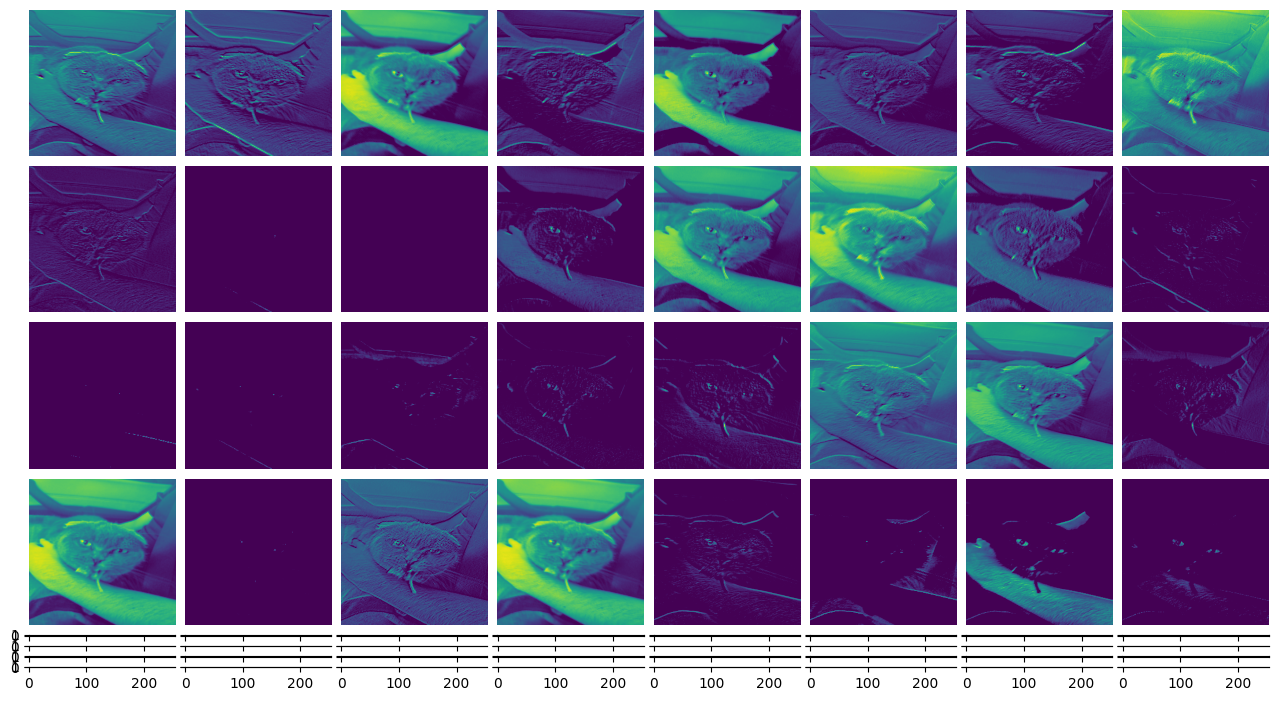

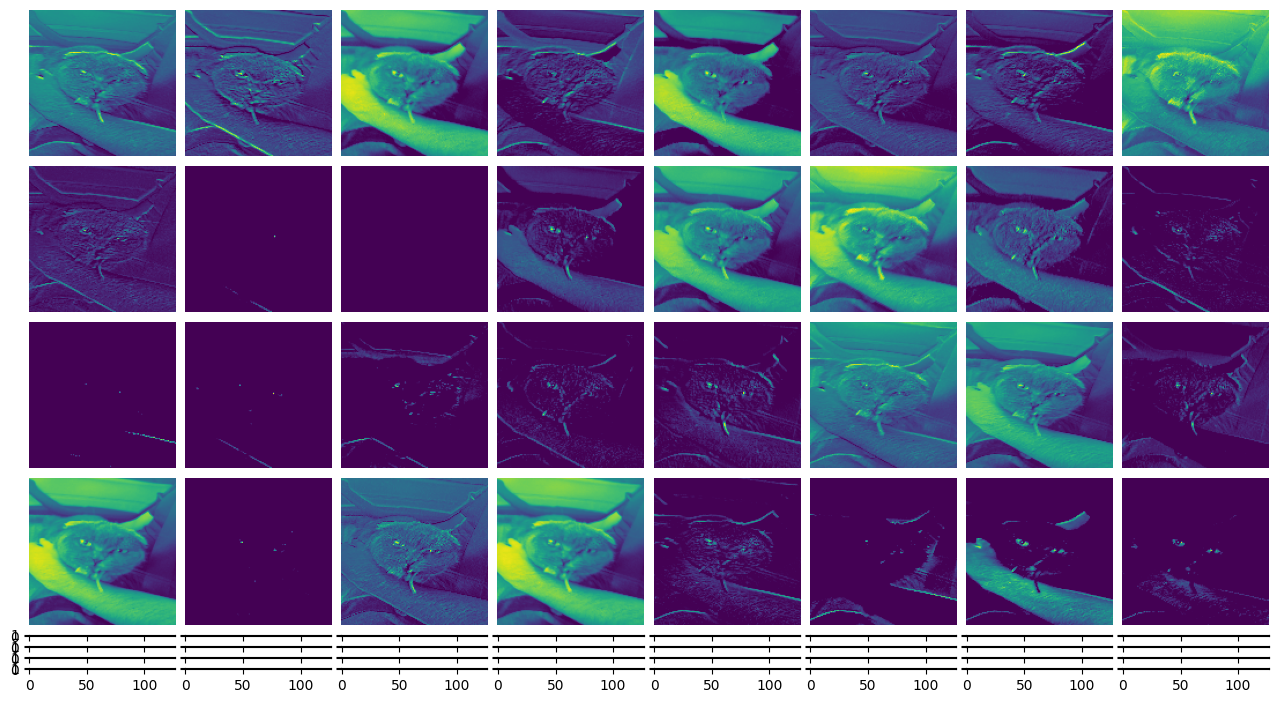

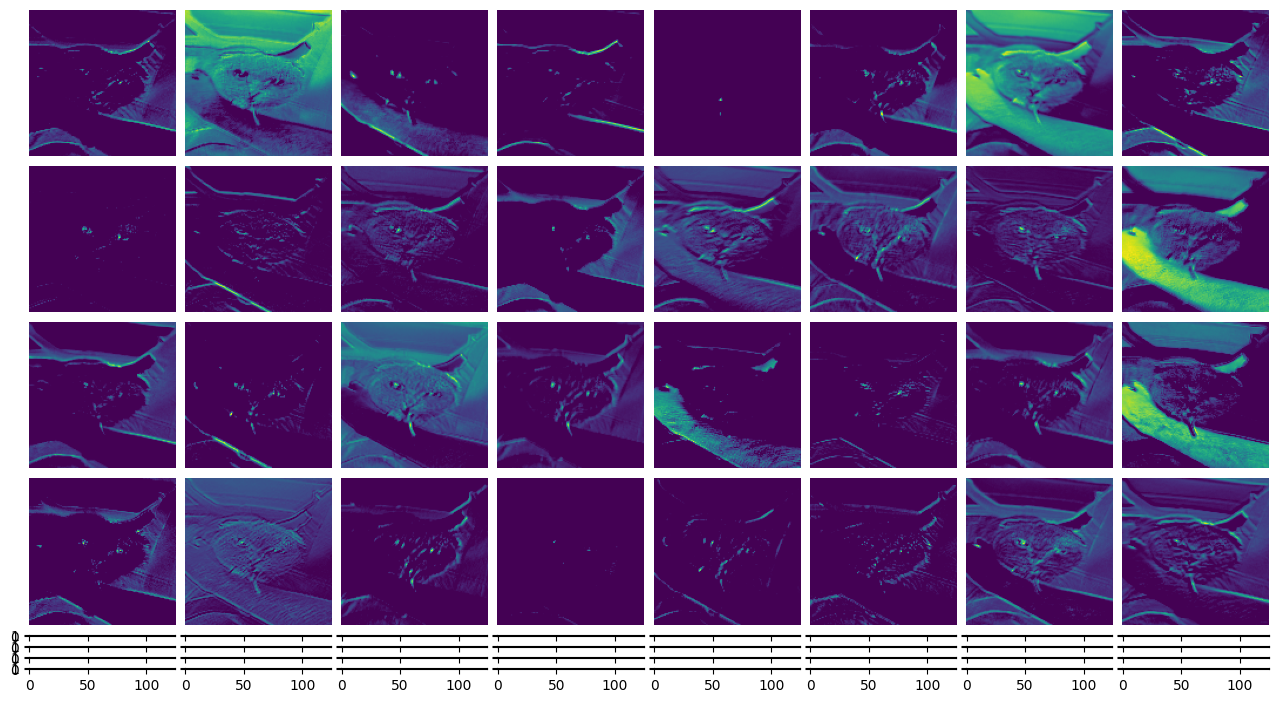

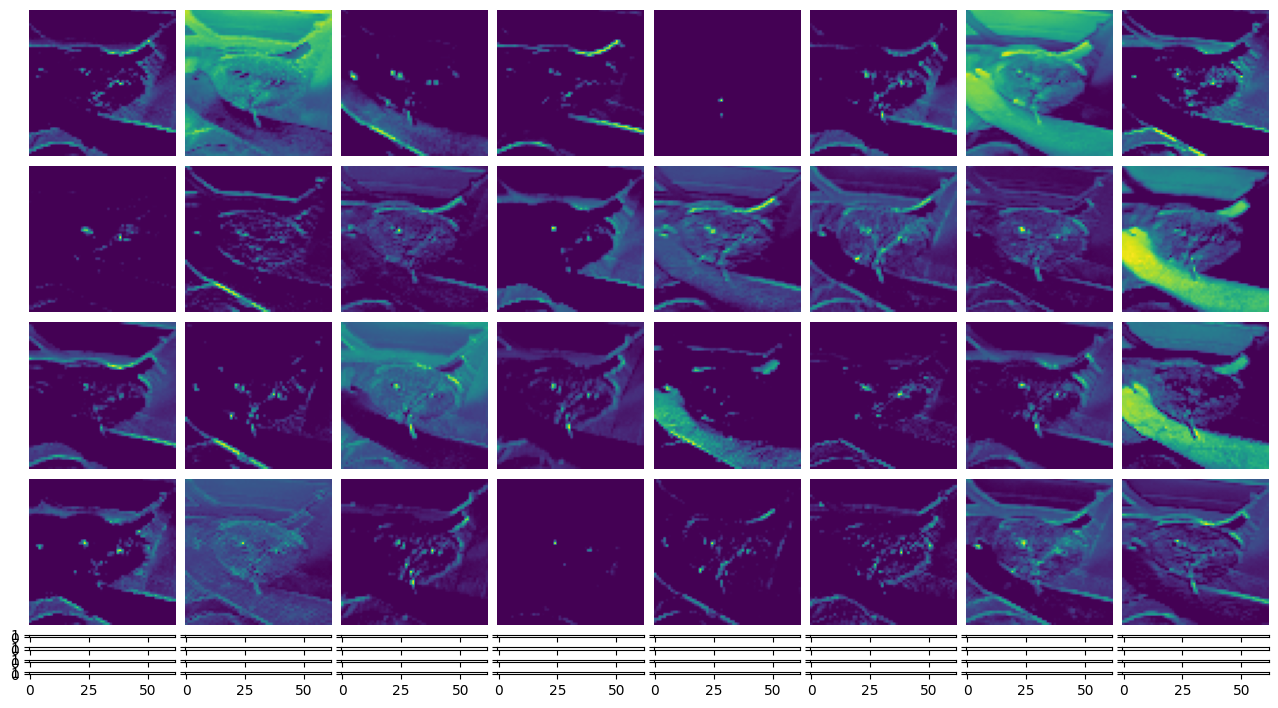

In [79]:
from keras import models

PATH = os.getcwd() + '/fotos_de_mi_gato/Guadalupe2.jpg'

img = image.load_img(PATH, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(x)

conv_layer_names = []

for layer in model.layers[:8]:
    if 'conv2d' in layer.name:
        conv_layer_names.append(layer.name)
        
from mpl_toolkits.axes_grid1 import ImageGrid

PATH = os.getcwd() + '/imagenes/'

def plot_layers(name, activation):
    fig = plt.figure(figsize=(16, 16))
    grid = ImageGrid(fig, 111, nrows_ncols=(8, 8), axes_pad=0.1)
    for i in range(32):
        ax = grid[i]
        ax.imshow(activation[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.savefig(PATH  + name + '.png')
    plt.show()
    
for name, activation in zip(conv_layer_names, activations):
    plot_layers(name, activation)